In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2, f_classif

In [6]:
#Load your dataset
df = pd.read_csv("E:\internship.py\diabetes_prediction_dataset.csv")

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Categorical Handling
1. Label encoding for gender (Male/Female/other)

In [8]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

In [9]:
le_smoking = LabelEncoder()
df['smoking_history'] = le_smoking.fit_transform(df['smoking_history'])

Categorical Analysis: Chi-Square Test

In [10]:
cat_features = ['hypertension', 'gender','heart_disease','smoking_history']

In [11]:
X_cat = df[cat_features]
y=df['diabetes']

In [12]:
chi_scores, p_values = chi2(X_cat, y)
#Create a Summary Table
chi2_results = pd.DataFrame({
    'Feature': cat_features,
    'chi2 Score': chi_scores,
    'P-Value': p_values
}).sort_values(by='chi2 Score', ascending = False)
print("---Categorical Feature Importance (chi2) ---")
print(chi2_results)



---Categorical Feature Importance (chi2) ---
           Feature   chi2 Score       P-Value
0     hypertension  3620.485416  0.000000e+00
2    heart_disease  2832.761069  0.000000e+00
3  smoking_history  1456.487769  0.000000e+00
1           gender    82.045142  1.330137e-19


Anova F-Test

In [13]:
num_features =['age','bmi','HbA1c_level','blood_glucose_level']
X_num = df[num_features]

In [14]:
f_scores, p_values_anova = f_classif(X_num, y)

#Create a Summary Table
anova_results = pd.DataFrame({
    'Feature': num_features,
    'F_Score': f_scores,
    'P-Value': p_values_anova
}).sort_values(by='F_Score', ascending =False)
print("\n--- Numerical Feature Importance (ANOVA)---")
print(anova_results)


--- Numerical Feature Importance (ANOVA)---
               Feature       F_Score  P-Value
3  blood_glucose_level  21363.054361      0.0
2          HbA1c_level  19122.211184      0.0
0                  age   7131.405852      0.0
1                  bmi   4816.113932      0.0


Visualizing the Importance

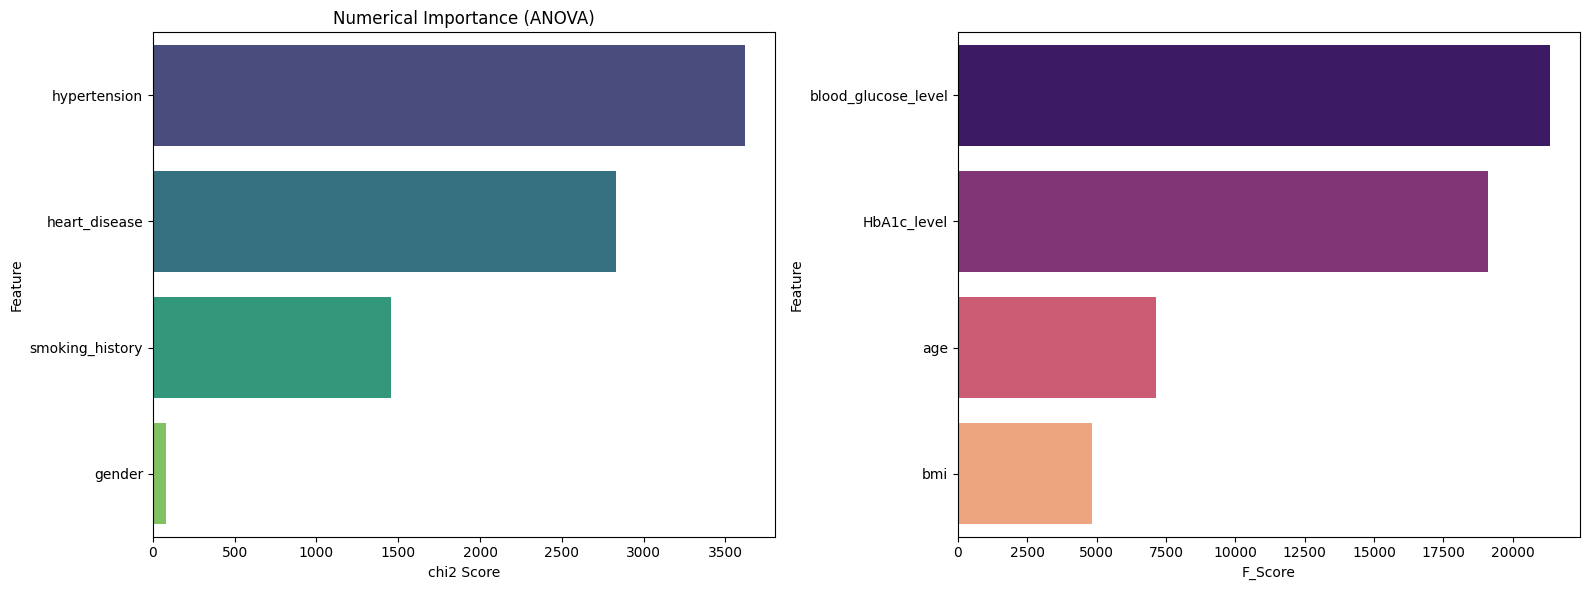

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots (1,2, figsize=(16,6))

#Plot chi2
sns.barplot (x='chi2 Score', y='Feature', hue='Feature', data=chi2_results, ax=ax[0], palette='viridis')
ax[0].set_title('Categorical Importance (Cgi-Square)')

#Plot ANOVA
sns.barplot (x='F_Score', y='Feature', hue='Feature', data=anova_results, ax=ax[1], palette='magma')
ax[0].set_title('Numerical Importance (ANOVA)')

plt.tight_layout()
plt.show()


In [16]:
selected_cat_names=['hypertension','heart_disease','smoking_history']
selected_numerical_columns=['blood_glucose_level','HbA1c_level']

In [17]:
final_selected_columns = selected_numerical_columns + selected_cat_names

In [18]:
X=df[final_selected_columns]
y=df['diabetes']

In [19]:
y.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

Splitting The Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

Scale the Data (Crucial for Logistic Regression)

In [21]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


Train Model

In [22]:
model = LogisticRegression(class_weight='balanced') #Handles the imbalance of diabetes cases
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
preds = model.predict(X_test_scaled)
score = accuracy_score(y_test,preds)


In [24]:
print(f'Accuracy Score is {score}')


Accuracy Score is 0.8592


In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [30]:
prec = precision_score(y_test, preds)
print(f"Precision : {prec:.2f} (How accurate the 'Positive' cells were)")

Precision : 0.36 (How accurate the 'Positive' cells were)


In [31]:
rec = recall_score(y_test, preds)
print(f"Recall : {rec:.2f} (How many 'Sick' people were caught)")

Recall : 0.83 (How many 'Sick' people were caught)


In [32]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     18300
           1       0.36      0.83      0.50      1700

    accuracy                           0.86     20000
   macro avg       0.67      0.84      0.71     20000
weighted avg       0.93      0.86      0.88     20000

